Images infectées : 13780
Images non infectées : 13780


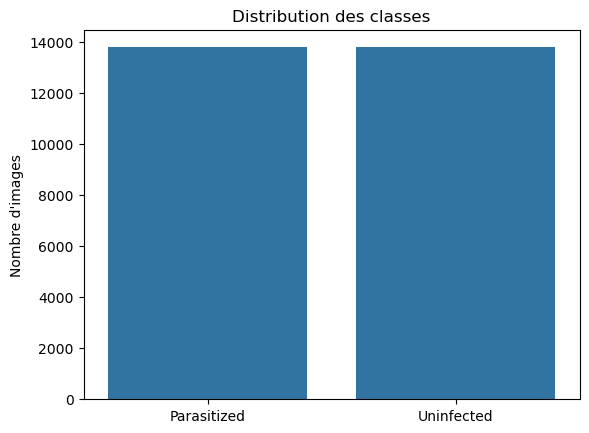

In [1]:
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Chemins
from  pathlib import Path 
path = Path(r"C:\Users\congo\Desktop\cell_images")
data_dir = path
parasitized_dir = os.path.join(data_dir, "Parasitized")
uninfected_dir = os.path.join(data_dir, "Uninfected")

# Nombre d'images par classe
num_parasitized = len(os.listdir(parasitized_dir))
num_uninfected = len(os.listdir(uninfected_dir))

print(f"Images infectées : {num_parasitized}")
print(f"Images non infectées : {num_uninfected}")

# Distribution des classes
sns.barplot(x=["Parasitized", "Uninfected"], y=[num_parasitized, num_uninfected])
plt.title("Distribution des classes")
plt.ylabel("Nombre d'images")
plt.show()


In [2]:
import os
import shutil
import random

# Dossiers source
source_dir = r"C:\Users\congo\Desktop\cell_images"  # à adapter selon ton chemin réel

# Dossiers destination
base_output_dir = r"C:\Users\congo\Desktop\cell_images_split"
train_dir = os.path.join(base_output_dir, "train")
val_dir = os.path.join(base_output_dir, "validation")

# Paramètre de split
split_ratio = 0.8  # 80% train, 20% validation

# Création des dossiers
for category in ['Parasitized', 'Uninfected']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

# Séparation des fichiers
for category in ['Parasitized', 'Uninfected']:
    source_path = os.path.join(source_dir, category)
    images = os.listdir(source_path)
    random.shuffle(images)

    split_index = int(len(images) * split_ratio)
    train_images = images[:split_index]
    val_images = images[split_index:]

    for img in train_images:
        src = os.path.join(source_path, img)
        dst = os.path.join(train_dir, category, img)
        shutil.copy2(src, dst)

    for img in val_images:
        src = os.path.join(source_path, img)
        dst = os.path.join(val_dir, category, img)
        shutil.copy2(src, dst)

print("✅ Séparation terminée avec succès.")


✅ Séparation terminée avec succès.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r'C:\Users\congo\Desktop\cell_images_split\train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    r'C:\Users\congo\Desktop\cell_images_split\validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 22076 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Création du modèle CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # sortie binaire
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:

# Entraînement
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

C:\Users\congo\anaconda3\envs\my_tensorflow_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 797s 1s/step - accuracy: 0.7262 - loss: 0.5356 - val_accuracy: 0.9376 - val_loss: 0.1807
Epoch 2/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 495s 717ms/step - accuracy: 0.9524 - loss: 0.1485 - val_accuracy: 0.9497 - val_loss: 0.1534
Epoch 3/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 500s 725ms/step - accuracy: 0.9581 - loss: 0.1296 - val_accuracy: 0.9570 - val_loss: 0.1453
Epoch 4/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 520s 753ms/step - accuracy: 0.9597 - loss: 0.1166 - val_accuracy: 0.9545 - val_loss: 0.1538
Epoch 5/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 463s 671ms/step - accuracy: 0.9646 - loss: 0.1043 - val_accuracy: 0.9530 - val_loss: 0.1497
Epoch 6/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 467s 677ms/step - accuracy: 0.9729 - loss: 0.0828 - val_accuracy: 0.9519 - val_loss: 0.1628
Epoch 7/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 464s 672ms/step - accuracy: 0.9770 - loss: 0.0694 - val_accuracy: 0.9427 - val_loss: 0.2165
Epoch 8/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 463s 671ms/step - accuracy: 0.9811 - lo

In [6]:
model.save('malaria_cnn_model.keras')

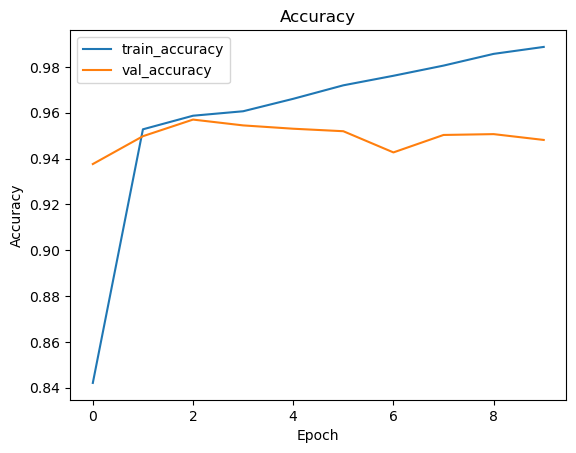

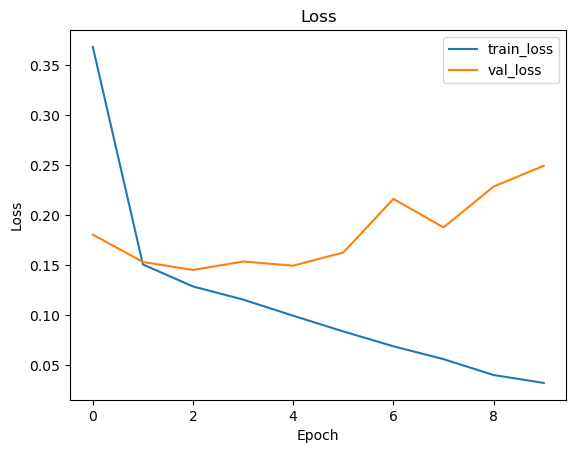

In [7]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


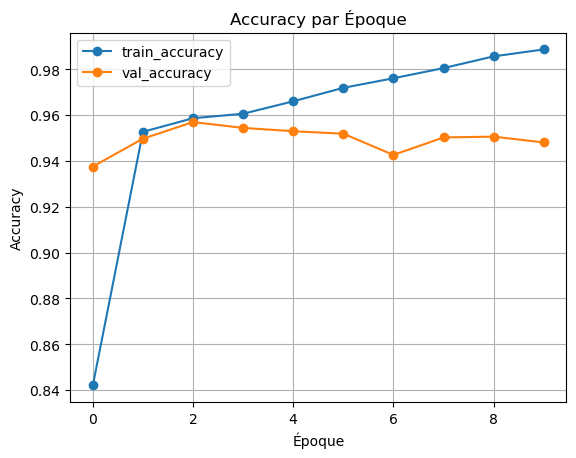

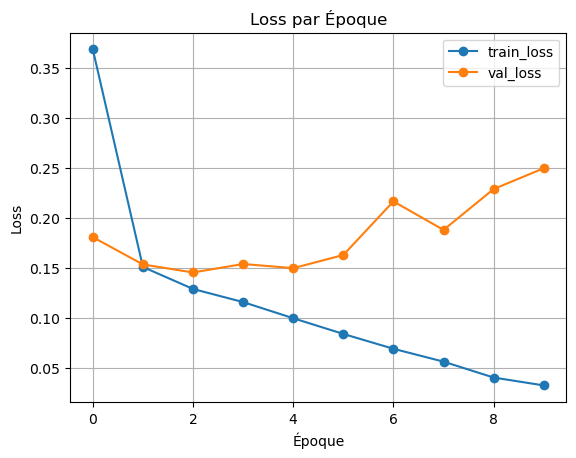

In [8]:
import matplotlib.pyplot as plt

# Accuracy avec points
plt.plot(history.history['accuracy'], marker='o', label='train_accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='val_accuracy')
plt.title('Accuracy par Époque')
plt.xlabel('Époque')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss avec points
plt.plot(history.history['loss'], marker='o', label='train_loss')
plt.plot(history.history['val_loss'], marker='o', label='val_loss')
plt.title('Loss par Époque')
plt.xlabel('Époque')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Évaluation sur les données de validation
loss, accuracy = model.evaluate(val_generator)
print(f"Loss : {loss:.4f}")
print(f"Accuracy : {accuracy*100:.2f}%")


173/173 ━━━━━━━━━━━━━━━━━━━━ 27s 154ms/step - accuracy: 0.9475 - loss: 0.2655
Loss : 0.2496
Accuracy : 94.81%


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Obtenir les vraies étiquettes et les prédictions
val_generator.reset()
Y_true = val_generator.classes
Y_pred_prob = model.predict(val_generator)
Y_pred = (Y_pred_prob > 0.5).astype(int).flatten()

# Matrice de confusion
cm = confusion_matrix(Y_true, Y_pred)
print("Matrice de confusion :")
print(cm)

# Rapport de classification
print("Rapport de classification :")
print(classification_report(Y_true, Y_pred, target_names=val_generator.class_indices.keys()))


173/173 ━━━━━━━━━━━━━━━━━━━━ 27s 155ms/step
Matrice de confusion :
[[1324 1432]
 [1342 1414]]
Rapport de classification :
              precision    recall  f1-score   support

 Parasitized       0.50      0.48      0.49      2756
  Uninfected       0.50      0.51      0.50      2756

    accuracy                           0.50      5512
   macro avg       0.50      0.50      0.50      5512
weighted avg       0.50      0.50      0.50      5512

